In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re,nltk

In [3]:
data = pd.read_excel('/content/drive/MyDrive/Movie Senitment/Data/total_comment_clean.xlsx')
data.head()

,Unnamed: 0,movie name,label,main comment,comment,cleaned
0,0.0,Nishpap Munna,pos,",""😎😎😎😎😎😎😎😋😋😋😋😋😋😋 nice movie""",", ""😎😎😎😎😎😎😎😋😋😋😋😋😋😋 সুন্দর সিনেমা""",সুন্দর সিনেমা
1,1.0,Nishpap Munna,ntr,"( নিশী মনি )""","( নিশী মনি )""",নিশী মনি
2,2.0,Nishpap Munna,pos,"💜,""I loved movie""","💜, ""আমি সিনেমা পছন্দ করি""",আমি সিনেমা পছন্দ করি
3,3.0,Nishpap Munna,neg,"2022,"",""খুব ফালতু""","2022,"",""খুব ফালতু""",খুব ফালতু
4,4.0,Nishpap Munna,neg,"24,"" ছামার সিনেমা""","24, ""ছামার সিনেমা""",ছামার সিনেমা


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8249 entries, 0 to 8248
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    8249 non-null   int64 
 1   movie name    8249 non-null   object
 2   label         8249 non-null   object
 3   main comment  8249 non-null   object
 4   comment       8249 non-null   object
 5   cleaned       8247 non-null   object
dtypes: int64(1), object(5)
memory usage: 386.8+ KB


In [4]:
data.drop(columns={'Unnamed: 0'},axis=1,inplace=True)
data.dropna(inplace=True)

In [ ]:
data.groupby('label').size().reset_index(name='counts')

,label,counts
0,neg,2820
1,ntr,1548
2,pos,3879


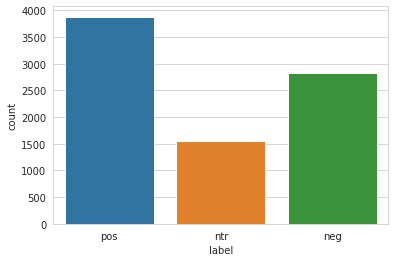

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x = 'label', data = data)

In [5]:
# Remove the Text with least words
data['length'] = data['cleaned'].apply(lambda x:len(x.split()))
dataset = data.loc[data.length>0]
dataset = dataset.reset_index(drop = True)
print("After Cleaning:","\nRemoved {} Small Text".format(len(data)-len(dataset)),
      "\nTotal Text:",len(dataset))

After Cleaning: 
Removed 0 Small Text 
Total Text: 8247


In [ ]:
dataset

,movie name,label,main comment,comment,cleaned,length
0,Nishpap Munna,pos,",""😎😎😎😎😎😎😎😋😋😋😋😋😋😋 nice movie""",", ""😎😎😎😎😎😎😎😋😋😋😋😋😋😋 সুন্দর সিনেমা""",সুন্দর সিনেমা,2
1,Nishpap Munna,ntr,"( নিশী মনি )""","( নিশী মনি )""",নিশী মনি,2
2,Nishpap Munna,pos,"💜,""I loved movie""","💜, ""আমি সিনেমা পছন্দ করি""",আমি সিনেমা পছন্দ করি,4
3,Nishpap Munna,neg,"2022,"",""খুব ফালতু""","2022,"",""খুব ফালতু""",খুব ফালতু,2
4,Nishpap Munna,neg,"24,"" ছামার সিনেমা""","24, ""ছামার সিনেমা""",ছামার সিনেমা,2
...,...,...,...,...,...,...
8242,Pagla Deewana,neg,হিজলা ছবি,হিজলা ছবি,হিজলা ছবি,2
8243,Pagla Deewana,neg,বাজে ছবি,বাজে ছবি,বাজে ছবি,2
8244,Pagla Deewana,pos,অনেক ভালো,অনেক ভালো,ভালো,1
8245,Pagla Deewana,ntr,ছবি,ছবি,ছবি,1


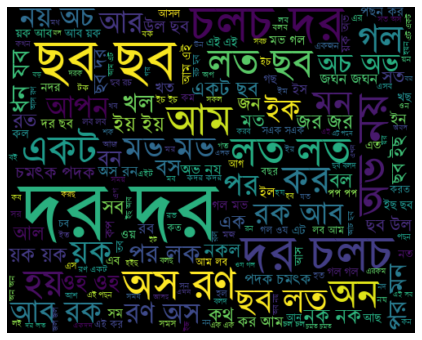

In [ ]:
from wordcloud import WordCloud 
# Plot the Word Cloud
allWords = ' '.join([comnt for comnt in data['cleaned']])
wordCloud = WordCloud(font_path='/content/drive/MyDrive/Movie Senitment/Nikosh/Nikosh.ttf', width =500, height =400, random_state = 21, max_font_size = 119).generate(allWords)

fig = plt.figure(1, figsize=(10, 6))
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [6]:
def data_summary(dataset):

    documents = []
    words = []
    u_words = []
    total_u_words = [word.strip().lower() for t in list(dataset.cleaned) for word in t.strip().split()]
    class_label= [k for k,v in dataset.label.value_counts().to_dict().items()]
    for label in class_label: 
        word_list = [word.strip().lower() for t in list(dataset[dataset.label==label].cleaned) for word in t.strip().split()]
        counts = dict()
        for word in word_list:
                counts[word] = counts.get(word, 0)+1
        ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
        documents.append(len(list(dataset[dataset.label==label].cleaned)))
        words.append(len(word_list))
        u_words.append(len(np.unique(word_list)))
       
        print("\nClass Name : ",label)
        print("Number of Documents:{}".format(len(list(dataset[dataset.label==label].cleaned))))  
        print("Number of Words:{}".format(len(word_list))) 
        print("Number of Unique Words:{}".format(len(np.unique(word_list)))) 
        print("Most Frequent Words:\n")
        for k,v in ordered[:10]:
              print("{}\t{}".format(k,v))
    print("Total Number of Unique Words:{}".format(len(np.unique(total_u_words))))           
   
    return documents,words,u_words,class_label

documents,words,u_words,class_names = data_summary(dataset)   


Class Name :  pos
Number of Documents:3879
Number of Words:10239
Number of Unique Words:1430
Most Frequent Words:

সুন্দর	1373
ভাল	649
সিনেমা	372
ভালো	372
মুভি	363
ছবি	260
খুব	254
চলচ্চিত্র	253
সুপার	219
অসাধারণ	163

Class Name :  neg
Number of Documents:2820
Number of Words:7544
Number of Unique Words:987
Most Frequent Words:

ছবি	726
সিনেমা	662
খারাপ	552
ফালতু	424
বাজে	355
খুব	259
মুভি	244
বাল	188
আবাল	184
মভি	138

Class Name :  ntr
Number of Documents:1548
Number of Words:10152
Number of Unique Words:4012
Most Frequent Words:

না	199
ছবি	130
নায়ক	118
মুভি	108
ইয়া	98
এই	82
ওহে	74
ভালো	67
বাংলা	55
সিনেমা	54
Total Number of Unique Words:5183


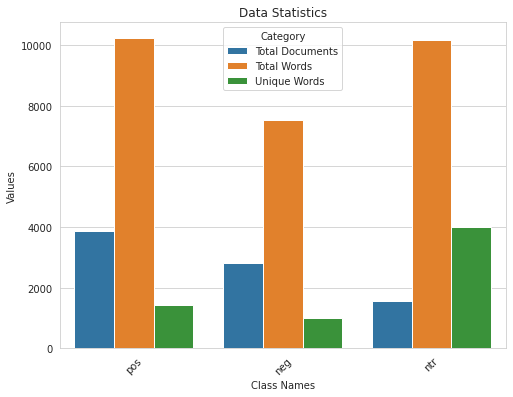

In [ ]:
data_matrix = pd.DataFrame({'Total Documents':documents,
                            'Total Words':words,
                            'Unique Words':u_words,
                            'Class Names':class_names})
df = pd.melt(data_matrix, id_vars="Class Names", var_name="Category", value_name="Values")
plt.figure(figsize=(8, 6))
ax = plt.subplot()

sns.barplot(data=df,x='Class Names', y='Values' ,hue='Category')
ax.set_xlabel('Class Names') 
ax.set_title('Data Statistics')

ax.xaxis.set_ticklabels(class_names, rotation=45);

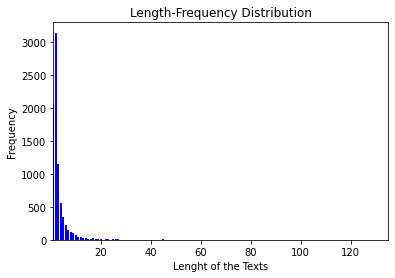

Maximum Length of a Text: 214
Minimum Length of a Text: 1
Average Length of a Text: 3.0


In [7]:
# Calculate the Text of each of the Text
dataset['TextLength'] = dataset.cleaned.apply(lambda x:len(x.split()))
frequency = dict()
for i in dataset.TextLength:
    frequency[i] = frequency.get(i, 0)+1

plt.bar(frequency.keys(), frequency.values(), color ="b")
plt.xlim(1, 135)
plt.xlabel('Lenght of the Texts')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')
plt.show()  
print(f"Maximum Length of a Text: {max(dataset.TextLength)}")
print(f"Minimum Length of a Text: {min(dataset.TextLength)}")
print(f"Average Length of a Text: {round(np.mean(dataset.TextLength),0)}")

### feature extraction, label encoding, spilt

In [8]:
# Label Encoding Function 
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

def label_encoding(sentiment,bool):
    
    le = LabelEncoder()
    le.fit(sentiment)
    encoded_labels = le.transform(sentiment)
    labels = np.array(encoded_labels) 
    class_names =le.classes_ 
    if bool == True:
        print("\n\t\t\t===== Label Encoding =====","\nClass Names:-->",le.classes_)
        for i in sample_data:
            print(sentiment[i],' ', encoded_labels[i],'\n')

    return labels

In [9]:
# Dataset Splitting Function 

def dataset_split(feature_space,sentiment):

    X_train,X_test,y_train,y_test = train_test_split(feature_space,sentiment,train_size = 0.8,
                                                  test_size = 0.20,random_state =22,stratify=sentiment)
    print("Feature Size :======>",X_train.shape[1])
    print("\nDataset Distribution:\n")
    print("\tSet Name","\t\tSize")
    print("\t========\t\t======")

    print("\tFull\t\t\t",feature_space.shape[0],
        "\n\tTraining\t\t",X_train.shape[0],
        "\n\tTest\t\t\t",X_test.shape[0])
  
    return X_train,X_test,y_train,y_test


In [10]:
def calc_gram_tfidf(reviews,gram):

    tfidf = TfidfVectorizer(ngram_range=gram,use_idf=True,tokenizer=lambda x: x.split()) 
    X = tfidf.fit_transform(reviews)
    
    return tfidf,X

In [11]:
# Unigram Tf-idf value calculation
                                            

def calc_unigram_tfidf(reviews):
    tfidf = TfidfVectorizer(use_idf=True,tokenizer=lambda x: x.split()) 
    X = tfidf.fit_transform(reviews)
    
    return tfidf,X



In [12]:
# Bi-gram Tf-idf value calculation
                                            

def calc_bigram_tfidf(reviews):
    tfidf = TfidfVectorizer(ngram_range=(1,2),use_idf=True,tokenizer=lambda x: x.split()) 
    X = tfidf.fit_transform(reviews)
    
    return tfidf,X




In [13]:
# Tri-gram Tf-idf value calculation


def calc_trigram_tfidf(reviews):
    tfidf = TfidfVectorizer(ngram_range=(1,3),use_idf=True,tokenizer=lambda x: x.split()) 
    X = tfidf.fit_transform(reviews)
    
    return tfidf,X

    

### Classification Model

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score

In [ ]:
def model_defination():

    lr_model = LogisticRegression(random_state = 123, max_iter = 10000)
    dt_model = DecisionTreeClassifier(criterion = 'gini', random_state = 0, max_depth = 1, min_samples_split = 25)
    rf_model = RandomForestClassifier(criterion ='entropy', random_state = 13)
    mnb_model = MultinomialNB(alpha=0.431)
    knn_model = KNeighborsClassifier(n_neighbors=100, metric = 'minkowski', algorithm = 'ball_tree', n_jobs = 10)
    lsvm_model = SVC(kernel = 'linear',C = 0.2, probability=True, random_state = 0)
    ksvm_model = SVC(C= 1000,kernel = 'rbf',probability=True, gamma = 0.00015, random_state = 0)
    sgd_model = SGDClassifier(loss ='log',penalty='l2', max_iter=5)

    model_names = ['Logistic Regression','Decision Tree','Random Forest','Naive Bayes','KNN','Linear SVM','Kernel SVM','SGD']
    ml_models = [lr_model,dt_model,rf_model,mnb_model,knn_model,lsvm_model,ksvm_model,sgd_model]
    return ml_models,model_names

In [ ]:
def model_performace(model,X_train,X_test,y_train,y_test):
   
    my_dict = {}
    model.fit(X_train,y_train)
    pred_y = model.predict(X_test)
    my_dict['Accuracy'] = round(accuracy_score(y_test, pred_y),4)*100 
    my_dict['Precision'] = round(precision_score(y_test, pred_y,average='micro'),4)*100 
    my_dict['Recall'] = round(recall_score(y_test, pred_y,average='micro'),4)*100 
    my_dict['F1 Score'] = round(f1_score(y_test, pred_y,average='micro'),4)*100 
    
    return my_dict  

In [ ]:
def performance_table(performance_dict):

    acc_list = []
    pr_list = []
    re_list = []
    f1_list = []
    for i in performance_dict.keys():
        acc_list.append(performance_dict[i]['Accuracy'])
        pr_list.append(performance_dict[i]['Precision'])
        re_list.append(performance_dict[i]['Recall'])
        f1_list.append(performance_dict[i]['F1 Score'])

    performance_df = pd.DataFrame({'Accuracy':acc_list,'Precision':pr_list,
                                   'Recall':re_list,'F1 Score':f1_list},
                                  index =['LR','DT','RF','MNB','KNN','Linear SVM','RBF SVM','SGD'])
    performance_df.style.highlight_max(color = 'lightgreen', axis = 0)
    return performance_df

In [ ]:
path = "/content/drive/MyDrive/Movie Senitment/json/"

In [ ]:
import json
# save the performance of the model for each gram feature 
gram_names = ['Unigram','Bigram','Trigram']
ngrams = [(1,1),(1,2),(1,3)]
for i,gram in enumerate(ngrams):
    tfidf,feature = calc_gram_tfidf(dataset.cleaned,gram)
    labels = label_encoding(dataset.label,False)
    X_train,X_test,y_train,y_test = dataset_split(feature,labels) 
    ml_models,model_names = model_defination()
    accuracy = {f'{model_names[j]}':model_performace(model,X_train,X_test,y_train,y_test) for j,model in enumerate(ml_models)}

    with open(path+f'ml_performance_{gram_names[i]}.json', 'w') as f:
          json.dump(accuracy, f)

Feature Size :======> 5183

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 8247 
	Training		 6597 
	Test			 1650


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


Feature Size :======> 16993

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 8247 
	Training		 6597 
	Test			 1650


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


Feature Size :======> 28493

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 8247 
	Training		 6597 
	Test			 1650


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


### ML model with Unigram

In [ ]:
accuracy1 = json.load(open('/content/drive/MyDrive/Movie Senitment/json/ml_performance_Unigram.json'))
table = performance_table(accuracy1)
table

,Accuracy,Precision,Recall,F1 Score
LR,93.58,93.58,93.58,93.58
DT,50.91,50.91,50.91,50.91
RF,92.85,92.85,92.85,92.85
MNB,88.55,88.55,88.55,88.55
KNN,82.12,82.12,82.12,82.12
Linear SVM,91.94,91.94,91.94,91.94
RBF SVM,92.79,92.79,92.79,92.79
SGD,93.82,93.82,93.82,93.82


In [ ]:
print(f"Highest Accuracy achieved by {table.Accuracy.idxmax(axis = 0)} at = {max(table.Accuracy)}")
print(f"Highest F1-Score achieved by {table['F1 Score'].idxmax(axis = 0)} at = {max(table['F1 Score'] )}")
print(f"Highest Precision Score achieved by {table['Precision'].idxmax(axis = 0)} at = {max(table['Precision'] )}")
print(f"Highest Recall Score achieved by {table['Recall'].idxmax(axis = 0)} at = {max(table['Recall'] )}")

Highest Accuracy achieved by SGD at = 93.82000000000001
Highest F1-Score achieved by SGD at = 93.82000000000001
Highest Precision Score achieved by SGD at = 93.82000000000001
Highest Recall Score achieved by SGD at = 93.82000000000001


### ML model with Bigram

In [ ]:
accuracy2 = json.load(open('/content/drive/MyDrive/Movie Senitment/json/ml_performance_Bigram.json'))
table2 = performance_table(accuracy2)
table2

,Accuracy,Precision,Recall,F1 Score
LR,93.33,93.33,93.33,93.33
DT,50.91,50.91,50.91,50.91
RF,93.33,93.33,93.33,93.33
MNB,87.15,87.15,87.15,87.15
KNN,85.58,85.58,85.58,85.58
Linear SVM,90.67,90.67,90.67,90.67
RBF SVM,91.27,91.27,91.27,91.27
SGD,93.58,93.58,93.58,93.58


In [ ]:
print(f"Highest Accuracy achieved by {table2.Accuracy.idxmax(axis = 0)} at = {max(table2.Accuracy)}")
print(f"Highest F1-Score achieved by {table2['F1 Score'].idxmax(axis = 0)} at = {max(table2['F1 Score'] )}")
print(f"Highest Precision Score achieved by {table2['Precision'].idxmax(axis = 0)} at = {max(table2['Precision'] )}")
print(f"Highest Recall Score achieved by {table2['Recall'].idxmax(axis = 0)} at = {max(table2['Recall'] )}")

Highest Accuracy achieved by SGD at = 93.58
Highest F1-Score achieved by SGD at = 93.58
Highest Precision Score achieved by SGD at = 93.58
Highest Recall Score achieved by SGD at = 93.58


### ML model with Trigram

In [ ]:
accuracy3 = json.load(open('/content/drive/MyDrive/Movie Senitment/json/ml_performance_Trigram.json'))
table3 = performance_table(accuracy3)
table3

,Accuracy,Precision,Recall,F1 Score
LR,92.97,92.97,92.97,92.97
DT,50.91,50.91,50.91,50.91
RF,92.67,92.67,92.67,92.67
MNB,85.94,85.94,85.94,85.94
KNN,85.39,85.39,85.39,85.39
Linear SVM,90.06,90.06,90.06,90.06
RBF SVM,90.61,90.61,90.61,90.61
SGD,93.15,93.15,93.15,93.15


In [ ]:
print(f"Highest Accuracy achieved by {table3.Accuracy.idxmax(axis = 0)} at = {max(table3.Accuracy)}")
print(f"Highest F1-Score achieved by {table3['F1 Score'].idxmax(axis = 0)} at = {max(table3['F1 Score'] )}")
print(f"Highest Precision Score achieved by {table3['Precision'].idxmax(axis = 0)} at = {max(table3['Precision'] )}")
print(f"Highest Recall Score achieved by {table3['Recall'].idxmax(axis = 0)} at = {max(table3['Recall'] )}")

Highest Accuracy achieved by SGD at = 93.15
Highest F1-Score achieved by SGD at = 93.15
Highest Precision Score achieved by SGD at = 93.15
Highest Recall Score achieved by SGD at = 93.15


###Corpus Grams

In [ ]:
cv,feature_vector = calc_trigram_tfidf(data.cleaned)
df = pd.DataFrame(feature_vector.toarray(), columns = cv.get_feature_names())
print("Shape of TF-IDF Corpus unigram=====>",feature_vector.shape,'\n')
df

Shape of TF-IDF Corpus unigram=====> (8247, 28493) 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,ঃঞেঙূ,অ,অ টা,অ টা জানেনা,অ নেক,অ নেক প,অংশ,অংশ আছে,অংশ দেখলেই,অংশ দেখলেই বুঝি,...,৳,৷,৷ দিয়ে,৷ দিয়ে করান,৷ নীল,৷ নীল আকাশের,৷ সিনেমাটি,৷ সিনেমাটি আলতু,৷ফালতু,৷ফালতু মুভিটা
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8244,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8245,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
cv2,feature_vector2 = calc_bigram_tfidf(data.cleaned)
df2 = pd.DataFrame(feature_vector2.toarray(), columns = cv2.get_feature_names())
print("Shape of TF-IDF Corpus bigram=====>",feature_vector2.shape,'\n')
df2

Shape of TF-IDF Corpus bigram=====> (8247, 16993) 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,ঃঞেঙূ,অ,অ টা,অ নেক,অংশ,অংশ আছে,অংশ দেখলেই,অংশ হ,অই,অই সালার,...,ৰহমানেৰ ৰাহিম,ৰাহিম,ৰাহিম এটা,৳,৷,৷ দিয়ে,৷ নীল,৷ সিনেমাটি,৷ফালতু,৷ফালতু মুভিটা
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8244,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8245,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
cv3,feature_vector3 = calc_unigram_tfidf(data.cleaned)
df3 = pd.DataFrame(feature_vector3.toarray(), columns = cv3.get_feature_names())
print("Shape of TF-IDF Corpus trigram=====>",feature_vector3.shape,'\n')
df3

Shape of TF-IDF Corpus trigram=====> (8247, 5183) 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,ঃঞেঙূ,অ,অংশ,অই,অকাল,অক্ষমতা,অখাদ্য,অখিলআধান,অগে,অগ্রিম,...,্যিই,য়তসব,য়নেক,য়ে,য়েখানে,ৰহমানেৰ,ৰাহিম,৳,৷,৷ফালতু
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8244,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8245,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Final Model

 - Selected feature: Unigram
 - Selected model: SGDClassifier

In [15]:
# calculate the Tri-gram Tf-idf feature
cv,feature_vector = calc_unigram_tfidf(dataset.cleaned)

# Encode the labels
lables = label_encoding(dataset.label,False)

# Split the Feature into train and test set
X_train,X_test,y_train,y_test = dataset_split(feature_space=feature_vector,sentiment=lables)

Feature Size :======> 5183

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 8247 
	Training		 6597 
	Test			 1650


In [16]:
from sklearn.linear_model import SGDClassifier
classifier1 = SGDClassifier(loss ='log',penalty='l2', max_iter=5)
classifier1.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


SGDClassifier(loss='log', max_iter=5)

In [17]:
y_pred = classifier1.predict(X_test)
y_pred[:10]

array([2, 2, 0, 2, 2, 1, 2, 1, 2, 2])

In [18]:
print(f"Train Accuracy is: {round(classifier1.score(X_train, y_train)*100,2)}%")
print(f"Test Accuracy is : {round(classifier1.score(X_test, y_test)*100,2)}%")

Train Accuracy is: 96.97%
Test Accuracy is : 93.76%


In [19]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.96       564
           1       0.82      0.91      0.86       310
           2       0.96      0.95      0.96       776

    accuracy                           0.94      1650
   macro avg       0.92      0.93      0.92      1650
weighted avg       0.94      0.94      0.94      1650



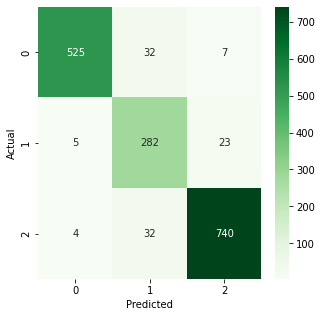

In [20]:
conf_mat = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap="Greens")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [21]:
pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


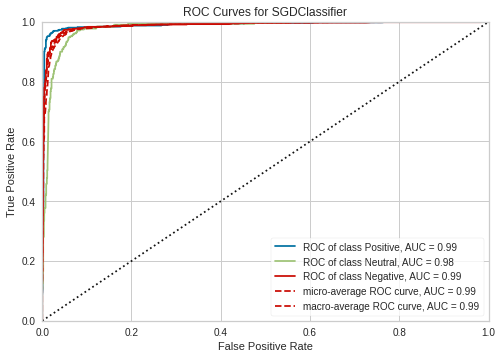

In [22]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(classifier1, classes=["Positive", "Neutral", "Negative"])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()   